# Fraud-u-not ML Model Training

### Import Libaries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'gray'})

### Import Dataset

In [4]:
fraudData = pd.read_csv('./card_transdata.csv')

fraudData

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


### Null value checks

In [5]:
print("Null values:")
fraudData.isnull().sum()

Null values:


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Data Exploration

In [6]:
print("percentage of fraud: ", fraudData['fraud'].value_counts().loc[1.0]  /  fraudData.shape[0] * 100)

fraudData['fraud'].value_counts()

percentage of fraud:  8.7403


0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [7]:
fraudData.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


##### Catergory Fraud effect

In [43]:
catergoryFraudData = pd.DataFrame(index=['Did Not', 'Did', 'Perc Change'])

for c in fraudData.columns:
    if fraudData[c].nunique() <= 2 and c != 'fraud':
        
        fraudMean0 = fraudData.loc[fraudData[c] == 0, 'fraud'].mean() * 100
        fraudMean1 = fraudData.loc[fraudData[c] == 1, 'fraud'].mean() * 100
        
        change = (max(fraudMean1, fraudMean0)- min(fraudMean1, fraudMean0)) / min(fraudMean1, fraudMean0) * 100
        change = str(round(change, 2)) + "%"
        catergoryFraudData[c] = [fraudMean0, fraudMean1, change]

catergoryFraudData

,repeat_retailer,used_chip,used_pin_number,online_order
Did Not,8.84488,10.0051,9.68766,1.34269
Did,8.72625,6.39557,0.27135,12.714
Perc Change,1.36%,56.44%,3470.17%,846.9%


##### Numeric Fraud Effect

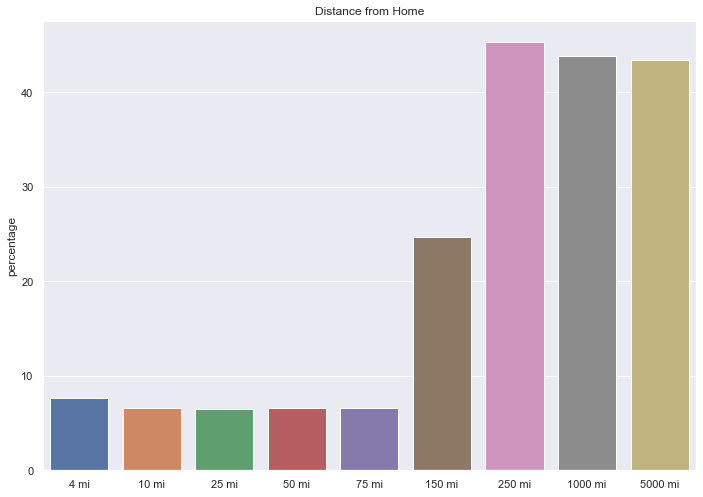

,percentage,Count
4 mi,7.660591,257082
10 mi,6.588012,243852
25 mi,6.535576,242427
50 mi,6.595591,131315
75 mi,6.593538,50231
150 mi,24.652292,48604
250 mi,45.328830,15692
1000 mi,43.846378,10311
5000 mi,43.478261,483


In [61]:
distanceRanges = [4, 10, 25, 50, 75, 150,250,1000, 5000]

distanceHomeFraudData = pd.DataFrame(index=[str(x) + " mi" for x in distanceRanges])

mean = []
count = []

for i in range(len(distanceRanges)):
    c = distanceRanges[i]
    cb = distanceRanges[i - 1] if i > 0 else 0
    fraudRangeData = fraudData.loc[(fraudData['distance_from_home'] <= c) &
                                   (fraudData['distance_from_home'] >= cb), 'fraud']
    fraudMean = fraudRangeData.mean()
    mean.append(fraudMean * 100)
    count.append(fraudRangeData.shape[0])
    
distanceHomeFraudData['percentage'] = mean
distanceHomeFraudData['Count'] = count

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=distanceHomeFraudData.index, y=distanceHomeFraudData['percentage']).set(title='Distance from Home')
plt.show()

distanceHomeFraudData

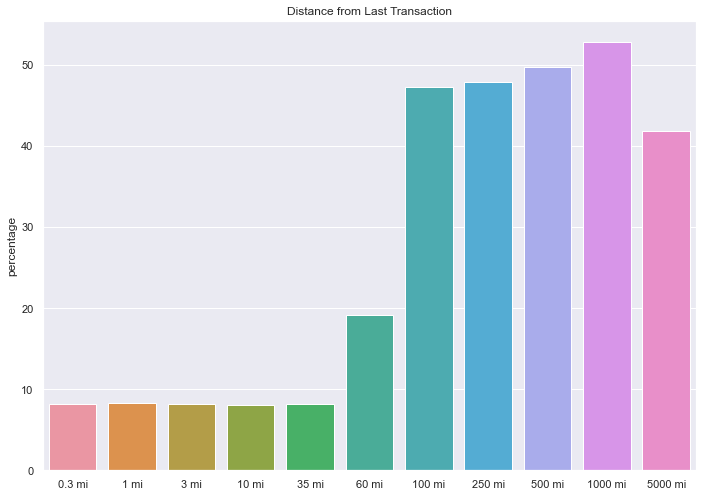

,percentage,Count
0.3 mi,8.136526,251938
1 mi,8.245019,248356
3 mi,8.165107,229354
10 mi,8.003406,170265
35 mi,8.157667,76186
60 mi,19.184691,12437
100 mi,47.292070,6204
250 mi,47.817746,4170
500 mi,49.687890,801
1000 mi,52.789700,233


In [57]:
distanceRanges = [0.3, 1, 3, 10, 35, 60, 100, 250, 500, 1000, 5000]

distanceTranFraudData = pd.DataFrame(index=[str(x) + " mi" for x in distanceRanges])

mean = []
count = []

for i in range(len(distanceRanges)):
    c = distanceRanges[i]
    cb = distanceRanges[i - 1] if i > 0 else 0
    fraudRangeData = fraudData.loc[(fraudData['distance_from_last_transaction'] <= c) &
                                   (fraudData['distance_from_last_transaction'] >= cb), 'fraud']
    fraudMean = fraudRangeData.mean()
    mean.append(fraudMean * 100)
    count.append(fraudRangeData.shape[0])
    
distanceTranFraudData['percentage'] = mean
distanceTranFraudData['Count'] = count

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(
    x=distanceTranFraudData.index, y=distanceTranFraudData['percentage']
).set(title='Distance from Last Transaction')
plt.show()

distanceTranFraudData

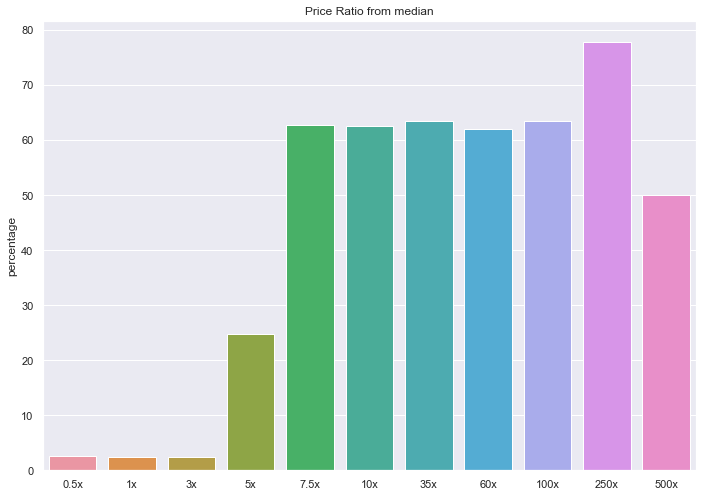

,percentage,Count
0.5x,2.513131,264451
1x,2.504357,236428
3x,2.478859,340923
5x,24.815428,86958
7.5x,62.769690,38192
10x,62.587551,15134
35x,63.459203,17293
60x,61.931818,528
100x,63.414634,82
250x,77.777778,9


In [69]:
ratioRanges = [0.5, 1, 3, 5, 7.5, 10, 35, 60, 100, 250, 500]

ratioFraudData = pd.DataFrame(index=[str(x) + "x" for x in ratioRanges])

mean = []
count = []

for i in range(len(ratioRanges)):
    c = ratioRanges[i]
    cb = ratioRanges[i - 1] if i > 0 else 0
    fraudRangeData = fraudData.loc[(fraudData['ratio_to_median_purchase_price'] <= c) &
                                   (fraudData['ratio_to_median_purchase_price'] >= cb), 'fraud']
    fraudMean = fraudRangeData.mean()
    mean.append(fraudMean * 100)
    count.append(fraudRangeData.shape[0])
    
ratioFraudData['percentage'] = mean
ratioFraudData['Count'] = count

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(
    x=ratioFraudData.index, y=ratioFraudData['percentage']
).set(title='Price Ratio from median')
plt.show()

ratioFraudData